# Flight Price Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## EDA on Train_Data

In [2]:
train_data=pd.read_excel("Data_Train.xlsx")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data.dropna(inplace=True)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [8]:
# Since except "Price" every features are object type,lets do preprocessing one by one

In [9]:
# Splitting Date_of_Journey into day and month & dropping the Date_of_Journey column

train_data["Journey_day"]=train_data["Date_of_Journey"].str.split("/").str[0]
train_data["Journey_month"]=train_data["Date_of_Journey"].str.split("/").str[1]

train_data.drop("Date_of_Journey",inplace=True,axis=1)

In [10]:
train_data.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03


In [11]:
# Splitting "Dep_Time" & dropping the same

train_data["Dep_hour"]=pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_min"]=pd.to_datetime(train_data["Dep_Time"]).dt.minute

train_data.drop("Dep_Time",axis=1,inplace=True)

In [12]:
# Splitting "Arrival_Time" & dropping the same

train_data["Arrival_hour"]=pd.to_datetime(train_data["Arrival_Time"]).dt.hour
train_data["Arrival_min"]=pd.to_datetime(train_data["Arrival_Time"]).dt.minute

train_data.drop("Arrival_Time",axis=1,inplace=True)

In [13]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,03,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,05,5,50,13,15


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Journey_day      10682 non-null  object
 9   Journey_month    10682 non-null  object
 10  Dep_hour         10682 non-null  int64 
 11  Dep_min          10682 non-null  int64 
 12  Arrival_hour     10682 non-null  int64 
 13  Arrival_min      10682 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 1.2+ MB


In [15]:
#Splitting "Durations" into hour & min

duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:                   #means duration will be only in either hour or min(not both)
        if "h" in duration[i]:                          #means duration in hour only
            duration[i] = duration[i].strip() + " 0m"   
        else:                                          #means duration in only min
            duration[i] = "0h " + duration[i]           

duration_hour = []
duration_min = []
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep = "h")[0]))    
    duration_min.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

In [16]:
train_data["Duration_hour"]=duration_hour
train_data["Duration_min"]=duration_min

In [17]:
#Droping the "Duration" column
train_data.drop("Duration",axis=1,inplace=True)

In [18]:
train_data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,03,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,05,5,50,13,15,7,25


### Dealing with Categorical Data 

In [19]:
#dropping "Total_Stop" & "Additional_Info"

train_data.drop("Route",axis=1,inplace=True)
train_data.drop("Additional_Info",axis=1,inplace=True)

In [20]:
train_data.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,03,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,05,5,50,13,15,7,25


In [21]:
train_data["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

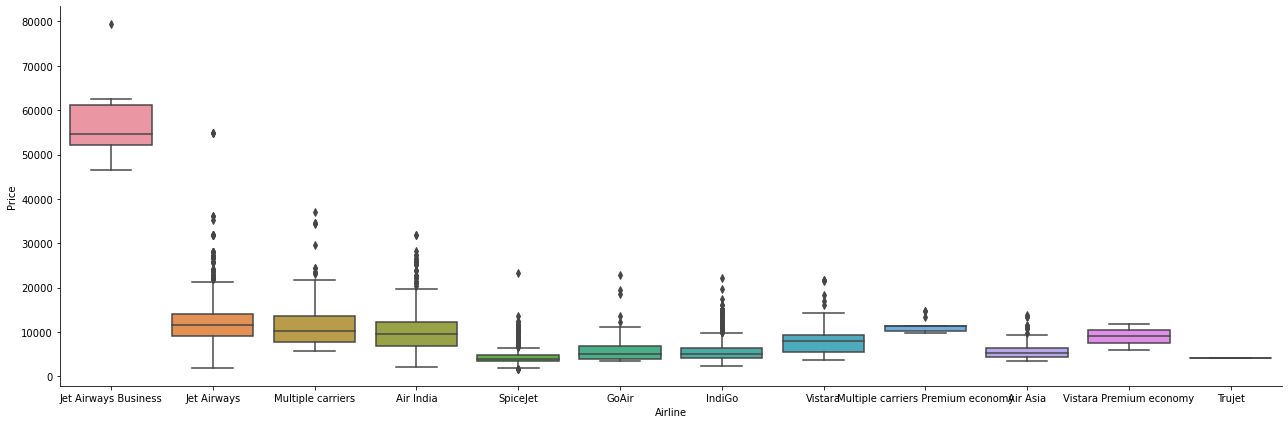

In [22]:
sns.catplot(x="Airline",y ="Price",data=train_data.sort_values("Price",ascending=False),height=6,aspect=3,kind="box")

In [23]:
#Conclusion: Jet Airways Business have the highest Price & rest have almost similar one

In [24]:
#performing OneHotEncoding on "Airline" since it's a Nominal kind
df_Airline = train_data[["Airline"]]

df_Airline = pd.get_dummies(df_Airline, drop_first= True)

df_Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [25]:
train_data["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

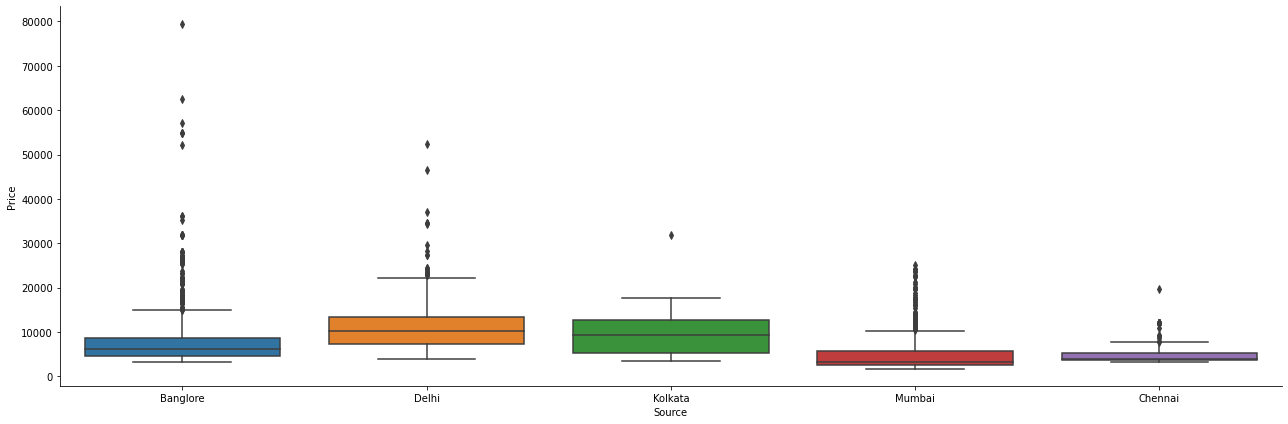

In [26]:
sns.catplot(x="Source",y ="Price",data=train_data.sort_values("Price",ascending=False),height=6,aspect=3,kind="box")

In [27]:
#Price is same for almost all the Source

In [28]:
#oneHotEncoding on "Source" column
df_Source=train_data[["Source"]]
df_Source=pd.get_dummies(df_Source,drop_first=True)
df_Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [29]:
train_data["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

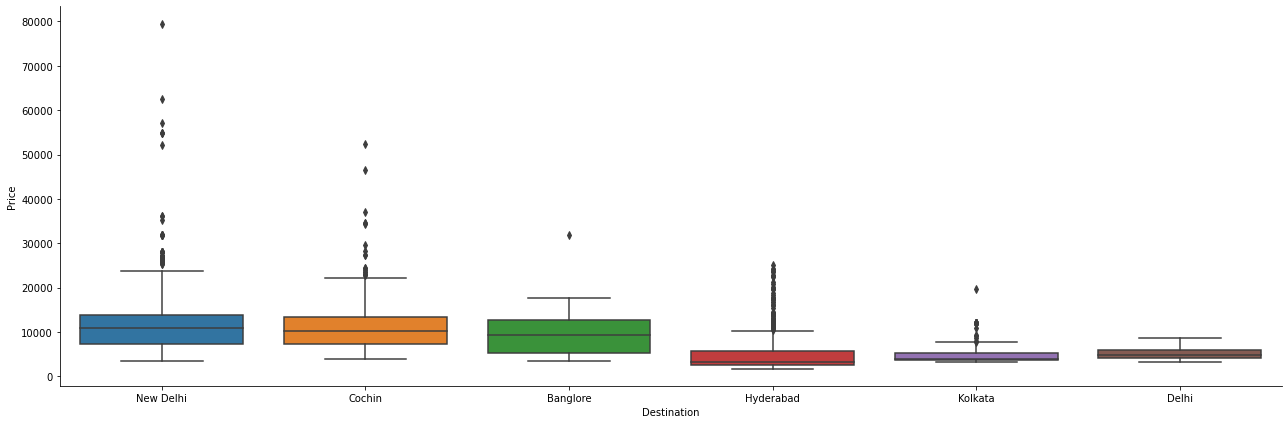

In [30]:
sns.catplot(x="Destination",y ="Price",data=train_data.sort_values("Price",ascending=False),height=6,aspect=3,kind="box")

In [31]:
#OneHotEncoding on "Destination" column

df_Destination=train_data[["Destination"]]
df_Destination=pd.get_dummies(df_Destination,drop_first = True)
df_Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [32]:
train_data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [33]:
train_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [34]:
train_data.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,03,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,05,5,50,13,15,7,25


In [35]:
# Concatenating the dataframe df_Airline,df_Source,df_Destination & train_data

train_data_final=pd.concat([train_data,df_Airline,df_Source,df_Destination],axis=1)
train_data_final

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,03,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,05,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,06,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,05,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,01,03,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,04,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,Air India,Kolkata,Banglore,0,4145,27,04,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,0,7229,27,04,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Banglore,New Delhi,0,12648,01,03,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [36]:
train_data_final.drop(["Airline","Source","Destination"],axis = 1,inplace = True)

In [37]:
train_data_final.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,03,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,05,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,06,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,05,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,01,03,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [38]:
np.where(train_data_final["Airline_Trujet"]==1)

(array([2878], dtype=int64),)

In [39]:
train_data_final.drop("Airline_Trujet",axis=1,inplace=True)

In [40]:
train_data_final.isnull().sum()

Total_Stops                                  0
Price                                        0
Journey_day                                  0
Journey_month                                0
Dep_hour                                     0
Dep_min                                      0
Arrival_hour                                 0
Arrival_min                                  0
Duration_hour                                0
Duration_min                                 0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi 

In [41]:
train_data_final.shape

(10682, 29)

## EDA on Test Data

In [42]:
test_data=pd.read_excel("Test_set.xlsx")

In [43]:
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [44]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [45]:
# Splitting Date_of_Journey into day and month & dropping the Date_of_Journey column

test_data["Journey_day"]=test_data["Date_of_Journey"].str.split("/").str[0]
test_data["Journey_month"]=test_data["Date_of_Journey"].str.split("/").str[1]

test_data.drop("Date_of_Journey",inplace=True,axis=1)

In [46]:
# Splitting "Dep_Time" & dropping the same

test_data["Dep_hour"]=pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"]=pd.to_datetime(test_data["Dep_Time"]).dt.minute

test_data.drop("Dep_Time",axis=1,inplace=True)

In [47]:
# Splitting "Arrival_Time" & dropping the same

test_data["Arrival_hour"]=pd.to_datetime(test_data["Arrival_Time"]).dt.hour
test_data["Arrival_min"]=pd.to_datetime(test_data["Arrival_Time"]).dt.minute

test_data.drop("Arrival_Time",axis=1,inplace=True)

In [48]:
#Splitting "Durations" into hour & min

duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:                   #means duration will be only in either hour or min(not both)
        if "h" in duration[i]:                          #means duration in hour only
            duration[i] = duration[i].strip() + " 0m"   
        else:                                          #means duration in only min
            duration[i] = "0h " + duration[i]           

duration_hour = []
duration_min = []
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep = "h")[0]))    
    duration_min.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

In [49]:
test_data["Duration_hour"]=duration_hour
test_data["Duration_min"]=duration_min

In [50]:
#Droping the "Duration" column
test_data.drop("Duration",axis=1,inplace=True)

In [51]:
#dropping "Total_Stop" & "Additional_Info"

test_data.drop("Route",axis=1,inplace=True)
test_data.drop("Additional_Info",axis=1,inplace=True)

In [52]:
#performing OneHotEncoding on "Airline" since it's a Nominal kind

df_Airline=test_data[["Airline"]]
df_Airline= pd.get_dummies(df_Airline,drop_first= True)

In [53]:
#oneHotEncoding on "Source" column
df_Source=test_data[["Source"]]
df_Source=pd.get_dummies(df_Source,drop_first=True)

In [54]:
#OneHotEncoding on "Destination" column

df_Destination=test_data[["Destination"]]
df_Destination=pd.get_dummies(df_Destination,drop_first = True)

In [55]:
test_data.drop(["Airline","Source","Destination"],axis = 1,inplace = True)

In [56]:
test_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [57]:
# Concatenating the dataframe df_Airline,df_Source,df_Destination & test_data

test_data_final=pd.concat([test_data,df_Airline,df_Source,df_Destination],axis=1)

In [58]:
test_data_final.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,06,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,05,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,05,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,05,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,06,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [59]:
test_data_final.shape

(2671, 28)

In [60]:
test_data_final.to_csv("test_data_final.csv")

In [64]:
#Selecting Independent and Dependent variables

x=train_data_final.drop("Price",axis=1)
y=train_data_final["Price"]

In [65]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

### Finding Correlation

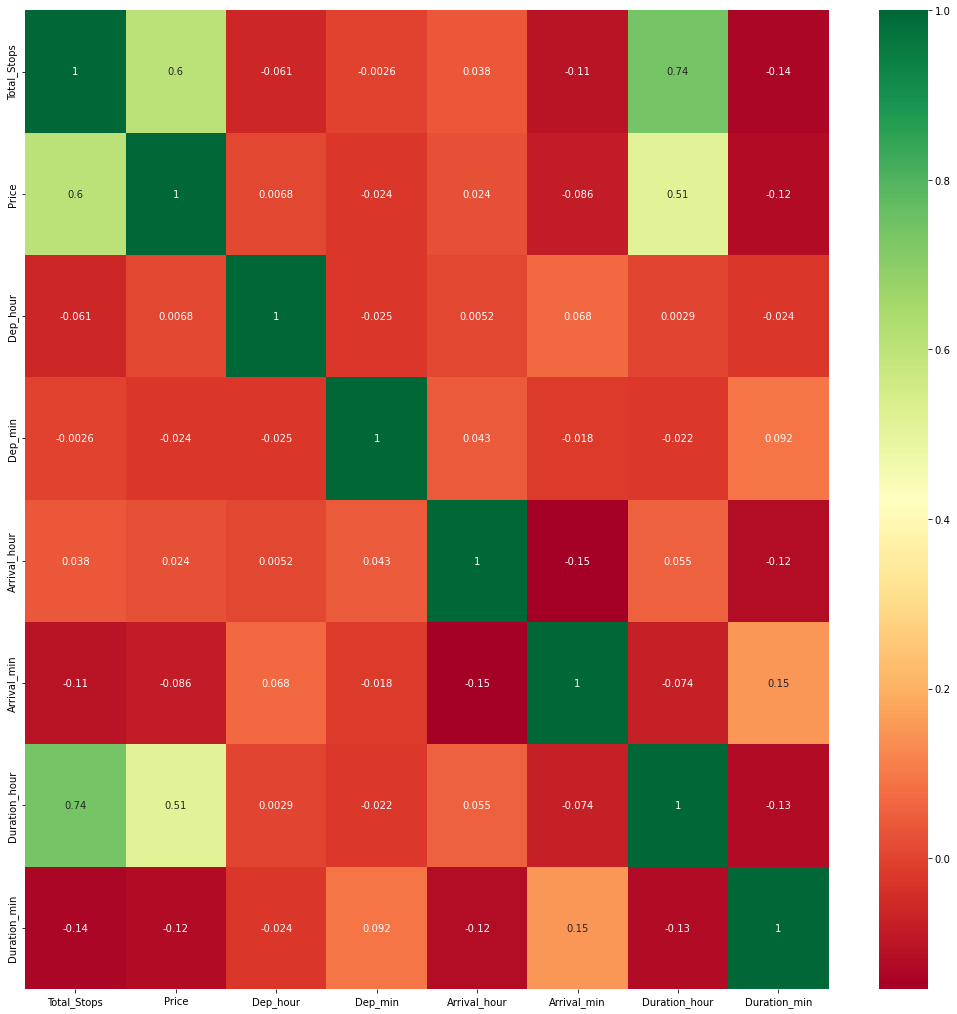

In [66]:
plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(),annot= True, cmap ="RdYlGn")
plt.show()

In [67]:
# Finding important Features using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor

In [68]:
reg=ExtraTreesRegressor()

In [69]:
reg.fit(x,y)

ExtraTreesRegressor()

In [70]:
reg.feature_importances_

array([2.30955092e-01, 1.43139392e-01, 5.42112979e-02, 2.38285345e-02,
       2.15555327e-02, 2.79506220e-02, 1.94441303e-02, 1.28748463e-01,
       1.73479113e-02, 9.94546724e-03, 1.67299410e-03, 1.55883172e-02,
       1.35855475e-01, 6.72291440e-02, 1.99858840e-02, 8.76128196e-04,
       2.72542304e-03, 5.40533764e-03, 8.24847012e-05, 4.15094913e-04,
       8.14307252e-03, 2.97773913e-03, 6.66491272e-03, 1.20301096e-02,
       1.21262150e-02, 5.68190256e-03, 5.23918322e-04, 2.48894041e-02])

In [71]:
imp_feat=pd.Series(reg.feature_importances_,index=x.columns)

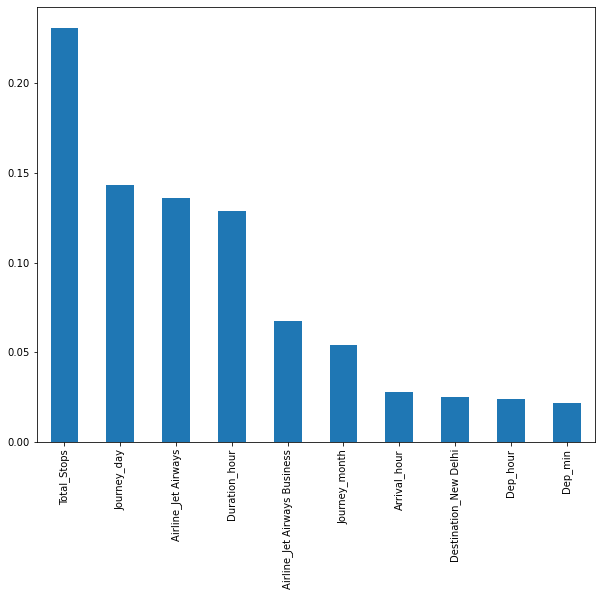

In [72]:
plt.figure(figsize=(10,8))
imp_feat.nlargest(10).plot(kind="bar")
plt.show()

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## Model Building

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
model=RandomForestRegressor()

In [77]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [78]:
predictions=model.predict(x_test)

In [79]:
model.score(x_test,y_test)

0.8200353710180064

C:\Users\GAURAV KUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

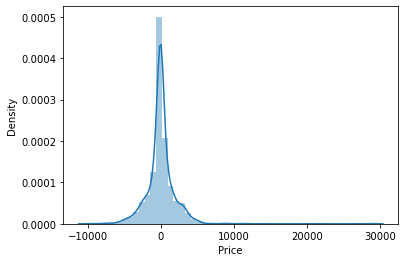

In [80]:
sns.distplot(y_test-predictions)


In [81]:
from sklearn import metrics

In [82]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1172.2780134951977
MSE: 3909560.825083734
RMSE: 1977.2609400591855


In [83]:
test_data_final.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,06,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,05,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,05,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,05,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,06,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [93]:
input_data = np.array([[1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0]])
model.predict(input_data)

array([14519.73066667])